# Support vector machines

Support vector machines (SVM) are primarily used for classification problems.
They are similar to several models we've already discussed.
First, SVM is, like logistic regression, a binary classification technique.
Second, SVM is similar to logistic regression mathematically but with a penalty parameter much like ridge regression.
Finally, SVM flexibly allows both linear and nonlinear modeling, making it a lot like linear discriminant analysis in the linear case as well as the nonlinear case if we use something called **the kernel trick**.

It is important to note that the term "support vector machine" tends to be used generically to cover both linear and nonlinear cases, as well as both SVM for classification and for regression.

## Linear SVM

### Intuition

The basic idea of binary classification is to draw a line between the datapoints belonging to two different classes.
Consider the data table in Figure 1, which has two predictor variables $X_i$ and a class label, and the associated scatterplot with shaded circles depicting class `1` and hollow circles depicting class `0`.

<!-- | $X_1$ | $X_2$ | Class |
|-------|-------|-------|
| 0.50  | 0.10  | 0     |
| 0.60  | 0.12  | 0     |
| 0.63  | 0.09  | 0     |
| 0.62  | 0.20  | 0     |
| 0.70  | 0.16  | 0     |
| 0.70  | 0.22  | 0     |
| 0.80  | 0.23  | 0     |
| 0.90  | 0.22  | 0     |
| 0.10  | 0.65  | 1     |
| 0.11  | 0.83  | 1     |
| 0.15  | 0.61  | 1     |
| 0.16  | 0.76  | 1     |
| 0.14  | 0.90  | 1     |
| 0.20  | 0.87  | 1     |
| 0.22  | 0.63  | 1     |
| 0.23  | 0.80  | 1     |
 -->


<table><tr>
<td> 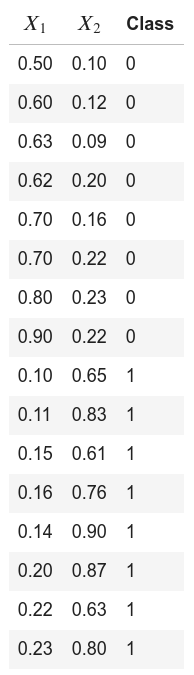 </td>
<td> 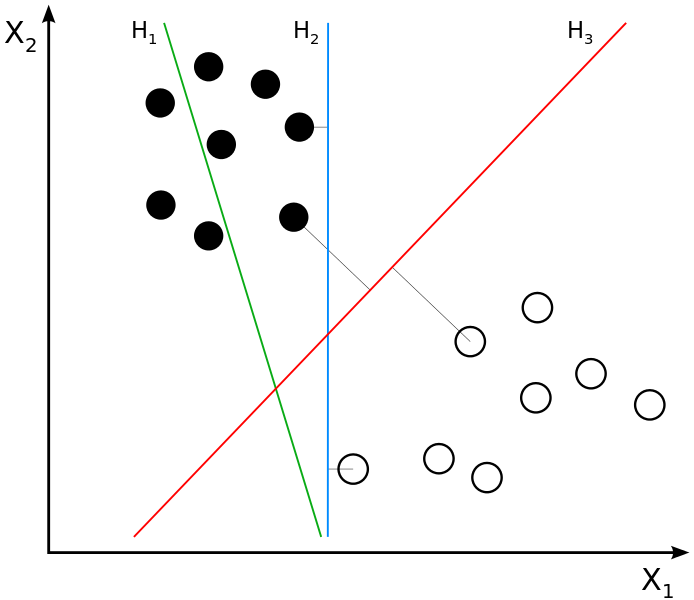 </td>
</tr></table>

<center><b>Figure 1. Data table and associated scatterplot showing possible decision boundaries between two classes.</b> Source: <a href="https://en.wikipedia.org/wiki/File:Svm_separating_hyperplanes_(SVG).svg">Wikipedia</a></center>

Figure 1 shows three possible decision boundaries through the datapoints, such that points to on side of the line (e.g. left) are classified `1` and the rest are classified `0`:

- $H_1$ is an example line with training error, because `1` is on both sides of the line, even though all `0` are to the right.
- $H_2$ is an example line with zero training error, because `1` and `0` are perfectly separated by the decision line
- $H_3$ is *another* example line with zero training error, but we intuitively prefer it because it **maximizes the distance between training points in both classes.**

### Maximizing the margin

SVM build on this intuition: we would like to fit a line between the classes such that, if we padded it evenly on either side, it would touch points from both classes at the same time.
In SVM terminology, this padding is called **a margin**, and the goal of SVM is to fit a line **that maximizes the margin**.

Another way of thinking about this is blowing up a long straight ballon between the two classes until it touched points from both classes.
The direction of the balloon would be the direction of the decision boundary.

A trained linear SVM thus has an underlying linear form with parameters determined by maximizing the margin.
The datapoints on the boundary of the margin are called **support vectors** and are what give SVM its name.
An example fitted model (solid red), margins (dashed lines), and support vectors (dark outlined datapoints of both colors) is shown in Figure 2.

<!-- 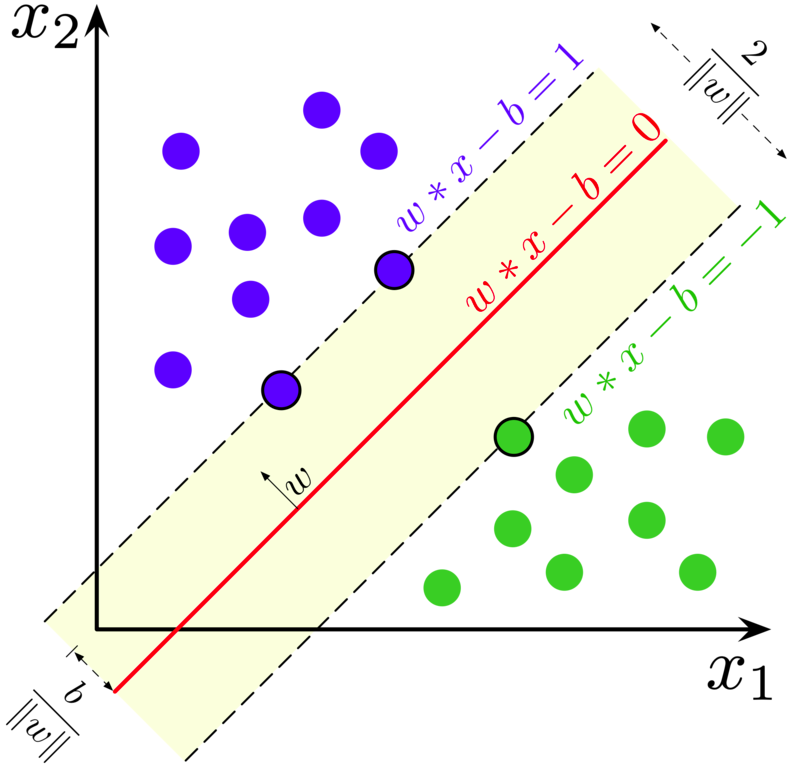 -->
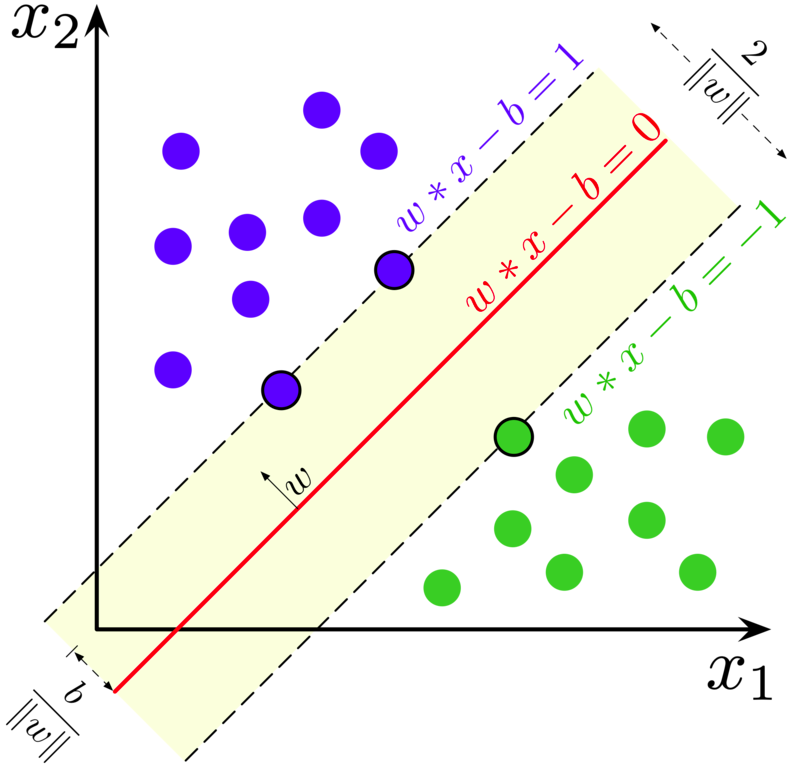
<center><b>Figure 2. Fitted SVM with decision boundary, margins, and support vectors indicated.</b> Source: <a href="https://en.wikipedia.org/wiki/File:SVM_margin.png">Wikipedia</a></center>

### Hard vs. soft margins

The fit in Figure 2 gives perfect performance on the training data because it is possible to draw a line between datapoints such that all datapoints on either side of the line belong to a single class.
When this is possible, the margin is called a **hard margin** because we did not have to relax the maximum margin constraint (as opposed to hard meaning difficulty).

However, often it is not possible to draw a perfect line like this, and the margin constraint must be relaxed.
When this happens, the margin become a **soft margin** analogous to the penalty parameter in ridge regression. 
The soft margin penalty tries to balance classification error with the "best" line, defined by the margin constraint.

### Beyond binary

While SVM is intrinsically binary, it is possible to construct N-way classifiers (i.e., more than 2 classes) by training multiple SVM models at once.
There are two common ways to train N-way SVM classifiers:

- **1 vs. 1** trains an SVM for each possible pair of classes, excluding the others. A new datapoint is run through all SVMs and given the class label it received most among the SVMs
- **1 vs. all** trains an SVM for each class, labeling the other classes as `0`. A new datapoint is run through all SVMs and given the class label which had the highest confidence among the SVMs.

Most software will take care of non-binary cases for you.

## Example: Linear SVM

### Load data

For this example, we'll use demographic and cardio measurement [data](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html) to predict heart disease. 
There is no documentation for the meaning of the variables, so the descriptions below are approximate.

| Variable  | Type  | Description |
|-----------|-------|-------------|
| Age       | Ratio | In years        |
| Sex       | Nominal | Sex, 1 = Male, 0 = Female        |
| ChestPain | Nominal | Chest pain experienced        |
| RestBP    | Ratio | Resting blood pressure        |
| Chol      | Ratio | Cholesterol in blood        |
| Fbs       | Nominal | Fasting blood sugar > 120 mg/dl, 1 = true; 0 = false          |
| RestECG   | Ordinal | resting electrocardiographic results         |
| MaxHR     | Ratio | Maximum heart rate        |
| ExAng     | Nominal |  Exercise induced angina, 1 = yes; 0 = no         |
| Oldpeak   | Ratio | ST depression induced by exercise relative to rest         |
| Slope     | Ordinal | The slope of the peak exercise ST segment         |
| Ca        | Ordinal | ???        |
| Thal      | Nominal | Thal defect         |
| AHD       | Nominal | Atherosclerotic heart disease (class label)        |

The goal is to predict heart disease (`AHD`) using the other properties of the data.

Import `pandas` so we can load a dataframe:

- `import pandas as pd`

In [60]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="importAs" id="G*NhDz5Jo?CcaJf3rUv}" x="150" y="308"><field name="libraryName">pandas</field><field name="libraryAlias" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field></block></xml>

Load the dataframe:

- Create `dataframe` and set it to `with pd do read_csv using` a list containing
    - `"datasets/heart.csv"`
- `dataframe`

In [61]:
dataframe = pd.read_csv('datasets/heart.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="31" y="222"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="VALUE"><block type="varDoMethod" id="4s18v%0iqE%_l@{fLYCo"><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="lists_create_with" id="x*dHwc!e,/XY5e1C_ak1"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="tN4Jmaffy/={ZFo;uu;W"><field name="TEXT">datasets/heart.csv</field></block></value></block></value></block></value></block><block type="variables_get" id="yN6MT1B[)Pk)cEECN_YZ" x="31" y="286"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></xml>

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


## Explore data

Let's check the data makes sense with the five figure summary:

- `with dataframe do describe using` 

In [62]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="-[lX-}4sT`|#7E(Sti)^" x="78" y="266"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


This looks good, but are there missing values?

The easiest way is to remove them and see if anything changed:

- Set `dataframe` to `with dataframe do dropna using`
- `dataframe`

In [63]:
dataframe = dataframe.dropna()

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="31" y="222"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="VALUE"><block type="varDoMethod" id="4s18v%0iqE%_l@{fLYCo"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">dropna</field><data>dataframe:dropna</data></block></value></block><block type="variables_get" id="yN6MT1B[)Pk)cEECN_YZ" x="31" y="286"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></xml>

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


Comparing against the initial display of the dataframe, we can see we lost 6 rows.
Since it's such a small number, we probably don't need to `describe` the data again.

Let's do a few standard visualizations to better understand these data.

First import `plotly.express`:

- `import plotly.express as px`

In [64]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="importAs" id="JKd}DIrGfV*IelKZ!4ls" x="129" y="219"><field name="libraryName">plotly.express</field><field name="libraryAlias" id="+yh,Zg{hON]zy6D~.rH#">px</field></block></xml>

And create a correlation matrix heatmap:

- `with px do imshow using` a list containing
    - `with dataframe do corr using`

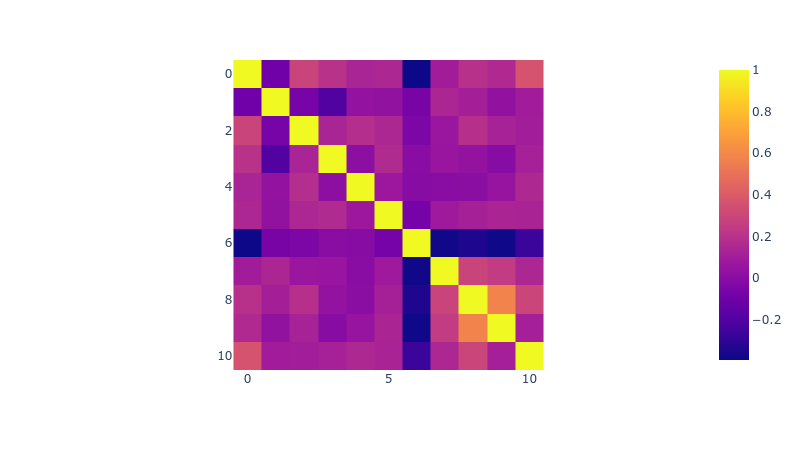

In [65]:
px.imshow(dataframe.corr())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="7PkTI5@+A6#C}J7CTmyF" x="39" y="343"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">imshow</field><data>px:imshow</data><value name="INPUT"><block type="lists_create_with" id="g^2EaX(wo6etoMYs:5}O"><mutation items="1"></mutation><value name="ADD0"><block type="varDoMethod" id="}+yhA11{~7/NTkg`wx);"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">corr</field><data>dataframe:corr</data></block></value></block></value></block></xml>

This time almost none of the measures are correlated with each other, except for 8 and 9, `Ca` and `Thal`.

We could do some more exploratory work here with scatterplots of the variables, but we don't expect to see very much if there are basically no correlations. 

We could also do histograms to see how the predictor variables are distributed if we wanted to.
This would potentially tell us if any of them had problematic distributions or outliers.

We will, however, do a histogram of the class label `AHD` since we would like to see how our classes are balanced. 

- `with px do histogram using` a list containing
    - `dataframe [ ]` with `"AHD"` inside

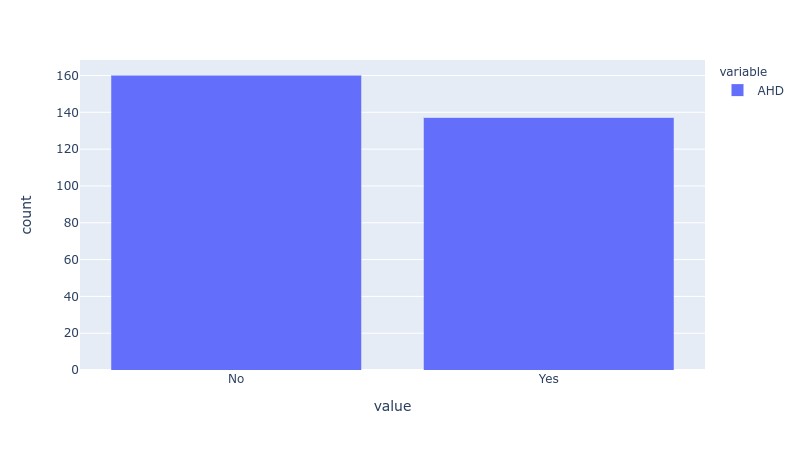

In [66]:
px.histogram(dataframe['AHD'])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="f`W@,!`/{w:Mj8xg1c]%" x="-93" y="188"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="INPUT"><block type="lists_create_with" id="PGwpE_*88~]2a_mLEpnr"><mutation items="1"></mutation><value name="ADD0"><block type="indexer" id="T-~9Cv[8P^;NQuvl{!zS"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="INDEX"><block type="text" id="r;i5s[blmRVMONR+41,,"><field name="TEXT">AHD</field></block></value></block></value></block></value></block></xml>

`Yes`/`No` heart disease are approximately balanced, with `No` being slightly more common, ~53% of the total data.

## Prepare train/test sets

First we need to separate our predictors (`X`) from our class label (`Y`), putting each into its own dataframe:

- Create `X` and set to `with dataframe do drop using` a list containing
    - freestyle `columns=["AHD"]`
- Create `Y` and set to `dataframe [ ]` containing a list with `"AHD"` inside

In [67]:
X = dataframe.drop(columns=["AHD"])
Y = dataframe[['AHD']]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="M9g^9:hbZQ0Cb9jKq9V6" x="27" y="188"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod" id="k7t38%eJz)@=B8{vW^(u"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="INPUT"><block type="lists_create_with" id="GF+zQWW-#ABEFw$9!#^8"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="fk{P(H^@/_!^1+tw-Hi*"><field name="CODE">columns=["AHD"]</field></block></value></block></value></block></value><next><block type="variables_set" id=":eCC|=CT/c:_fzcI.h5%"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field><value name="VALUE"><block type="indexer" id="A%ev_@Jrd7:a(Gozw{Zv"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="INDEX"><block type="lists_create_with" id="v`ZwcnYa3]GMVDC!T3al"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="H9b;qzWmM({49_lwSk(2"><field name="TEXT">AHD</field></block></value></block></value></block></value></block></next></block></xml>

We need an extra step here.
As we've previously discussed, not all models can handle nominal variables.
This particular dataset has nominal variables for both the predictors and class label.
For the predictors, we want to create dummies *without* a reference level, but for the class label, we want to create dummies *with* a reference label.

Let's start with `X`:

- Set `X` to `with pd get_dummies using` a list containing
    - `X`
- `X` (so you can see what happened)


In [68]:
X = pd.get_dummies(X)

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="N[``Tj{Y-X9-:{:,LZie" x="17" y="246"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod" id="!snzGlMsbL.%p)$iCu~-"><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">get_dummies</field><data>pd:get_dummies</data><value name="INPUT"><block type="lists_create_with" id="iiIg%n|P;1H4Uu_(3Eqf"><mutation items="1"></mutation><value name="ADD0"><block type="variables_get" id="!(L^?R}r`]R[RgQMDh{H"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value></block></value></block></value></block><block type="variables_get" id="esj).}av[rq%)lp@R1MD" x="31" y="312"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></xml>

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,140,241,0,0,123,1,0.2,2,0.0,1,0,0,0,0,0,1
298,45,1,110,264,0,0,132,0,1.2,2,0.0,0,0,0,1,0,0,1
299,68,1,144,193,1,0,141,0,3.4,2,2.0,1,0,0,0,0,0,1
300,57,1,130,131,0,0,115,1,1.2,2,1.0,1,0,0,0,0,0,1


As you can see, every possible value or *level* of the nominal variables in `X` got its own dummy column, with a `1` indicating when the level was present and a `0` otherwise.

Let's do the same for `Y` but use `drop_first=True` to use a reference level:

- Set `Y` to `with pd get_dummies using` a list containing
    - `Y`
    - freestyle `drop_first=True`
- `Y` (so you can see what happened)

In [69]:
Y = pd.get_dummies(Y, drop_first=True)

Y

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="N[``Tj{Y-X9-:{:,LZie" x="17" y="246"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field><value name="VALUE"><block type="varDoMethod" id="!snzGlMsbL.%p)$iCu~-"><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">get_dummies</field><data>pd:get_dummies</data><value name="INPUT"><block type="lists_create_with" id="iiIg%n|P;1H4Uu_(3Eqf"><mutation items="2"></mutation><value name="ADD0"><block type="variables_get" id="!(L^?R}r`]R[RgQMDh{H"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="|?m-$2%VCi5BXiVb9E[+"><field name="CODE">drop_first=True</field></block></value></block></value></block></value></block><block type="variables_get" id="esj).}av[rq%)lp@R1MD" x="31" y="312"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></xml>

,AHD_Yes
0,0
1,1
2,1
3,0
4,0
...,...
297,1
298,1
299,1
300,1


As you can see, only 1 column was created where `Yes` was present, which is exactly what we want for a binary class label.

We're now ready to split the data into train/test sets:

- `import sklearn.model_selection as model_selection`

In [70]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable></variables><block type="importAs" id="E{QJ$O@lc8u.;OTWdVgf" x="-89" y="168"><field name="libraryName">sklearn.model_selection</field><field name="libraryAlias" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field></block></xml>

And do the actual split:

- Create `splits` and set to `with model_selection do train_test_split` using a list containing
    - `X`
    - `Y`
    - freestyle `random_state=1`
    
Setting random_state will make our results match each other.

In [71]:
splits = model_selection.train_test_split(X, Y, random_state=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="HpD!.HSC`PPRg]21i*7c" x="-102" y="134"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field><value name="VALUE"><block type="varDoMethod" id="fUetl3$Ak=SI~T6T5!6c"><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="INPUT"><block type="lists_create_with" id="uUY%r2L/7acQcS/KbQvx"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id="jN^;NIVaV%22*W_^|!uK"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value><value name="ADD1"><block type="variables_get" id="OOZSj;YDm{T6q%{~5?B1"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="Gg*^%q4qIJwc*of,V|rb"><field name="CODE">random_state=1</field></block></value></block></value></block></value></block></xml>

## Fit model

We need to import libraries for:

- SVM
- Metrics
- Ravel

As well as libraries we need to standardize:

- Scale
- Pipeline

**SVM is very sensitive to standardization.**

So do the following imports:

- `import sklearn.svm as svm`
- `import sklearn.metrics as metrics`
- `import numpy as np`
- `import sklearn.preprocessing as pp`
- `import sklearn.pipeline as pipe`

In [72]:
import sklearn.svm as svm
import numpy as np
import sklearn.preprocessing as pp
import sklearn.pipeline as pipe
import sklearn.metrics as metrics

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-1?@LYu7gyhX}3NV$-Lv">svm</variable><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable></variables><block type="importAs" id="tb8M1lM!u45Sg7*|pjG)" x="58" y="81"><field name="libraryName">sklearn.svm</field><field name="libraryAlias" id="-1?@LYu7gyhX}3NV$-Lv">svm</field><next><block type="importAs" id="#n~K{o=Qop7Z[_YEjs`u"><field name="libraryName">numpy</field><field name="libraryAlias" id="hxqH|@PJU~wrI]t*tHgd">np</field><next><block type="importAs" id="*}7RY7RRNo7VC5@m%Tk["><field name="libraryName">sklearn.preprocessing</field><field name="libraryAlias" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><next><block type="importAs" id="+dJM+p.?OUVo4DOrpHa*"><field name="libraryName">sklearn.pipeline</field><field name="libraryAlias" id="=z9KfSBWpoDS,oj-?yx,">pipe</field><next><block type="importAs" id="{H02K*?VA0K3yr,FD/;h"><field name="libraryName">sklearn.metrics</field><field name="libraryAlias" id="jpz]0=,hLYv~rN^#0dFO">metrics</field></block></next></block></next></block></next></block></next></block></xml>

We're going to make a pipeline so we can scale and train in one step:

- Create variable `linearSVM`
- Set it to `with pipe do make_pipeline using` a list containing
    - `with pp create StandardScaler using`
    - `with svm create LinearSVC using` a list containing
        - freestyle `random_state=1`

In [73]:
linearSVM = pipe.make_pipeline(pp.StandardScaler(), svm.LinearSVC(random_state=1))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="62t{++m-.Nr*@.H.:hV+">linearSVM</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="-1?@LYu7gyhX}3NV$-Lv">svm</variable></variables><block type="variables_set" id="}81D/tZY#o}$E:M}:u4x" x="77" y="398"><field name="VAR" id="62t{++m-.Nr*@.H.:hV+">linearSVM</field><value name="VALUE"><block type="varDoMethod" id="(Noh/e~gvTM3-4|;g]s["><field name="VAR" id="=z9KfSBWpoDS,oj-?yx,">pipe</field><field name="MEMBER">make_pipeline</field><data>pipe:make_pipeline</data><value name="INPUT"><block type="lists_create_with" id="(Q-}ch^M{g#1!2LN+l,@"><mutation items="2"></mutation><value name="ADD0"><block type="varCreateObject" id="e9G_EPu`q{*0`$!~:jh~"><field name="VAR" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><field name="MEMBER">StandardScaler</field><data>pp:StandardScaler</data></block></value><value name="ADD1"><block type="varCreateObject" id="ar7keIh-Yv)+b+#Edsp_"><field name="VAR" id="-1?@LYu7gyhX}3NV$-Lv">svm</field><field name="MEMBER">LinearSVC</field><data>linear_model:LogisticRegression</data><value name="INPUT"><block type="lists_create_with" id="Al*7M]:C3p{sbqSe6!!_"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="Rijq=#hj2/,;|GT}ucWi"><field name="CODE">random_state=1</field></block></value></block></value></block></value></block></value></block></value></block></xml>

We can treat the whole pipeline as a classifier and call `fit` on it:

-  `with linearSVM do fit using` a list containing
    - `in list splits get # 1` (this is Xtrain)
    - `with np do ravel using` a list containing
        - `in list splits get # 3` (this is Ytrain)

In [74]:
linearSVM.fit(splits[0], np.ravel(splits[2]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="62t{++m-.Nr*@.H.:hV+">linearSVM</variable><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="varDoMethod" id="-@fm,911cJiCu@jkys%R" x="-94" y="192"><field name="VAR" id="62t{++m-.Nr*@.H.:hV+">linearSVM</field><field name="MEMBER">fit</field><data>linearSVM:fit</data><value name="INPUT"><block type="lists_create_with" id="qj[~!aNmN}=v;xQ.=$%L"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="W~.ZU([-)(,-i3=bTsB|"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="GIJn[jpD_~wa}#7IO!1K"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="Rh[;nrMLN$[cFFsZC~T|"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="~1yhID`7cKT3OGJbUA`C"><field name="VAR" id="hxqH|@PJU~wrI]t*tHgd">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="!2;YZV;l:7IzVqStgh^y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="YkCD57xF*SSN3[`_op{u"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="M@?wn}aoHxJYan0=AE3$"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="jNUa2BdXPG?H8|.br*@e"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value></block></xml>

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=1,
                           tol=0.0001, verbose=0))],
         verbose=False)

And finally, get predictions:

- Create `predictions`
- Set it to `with linearSVM do predict using` a list containing
    - `in list splits get #2`

In [75]:
predictions = linearSVM.predict(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="62t{++m-.Nr*@.H.:hV+">linearSVM</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="variables_set" id="FM4[*FDWeN(7%iHSAfQ?" x="-89" y="291"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field><value name="VALUE"><block type="varDoMethod" id="iyb},eS,^AG]P+e8|?_w"><field name="VAR" id="62t{++m-.Nr*@.H.:hV+">linearSVM</field><field name="MEMBER">predict</field><data>linearSVM:predict</data><value name="INPUT"><block type="lists_create_with" id="M~B*Kr~SV)~*y`D4O?Fo"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="fZwSBC7oN~ztuILQKhjb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="j+~A(%x]-W)Rd5k;,l#Z"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="LBFp2#($s_[4DJ8h!O;h"><field name="NUM">2</field></block></value></block></value></block></value></block></value></block></xml>

## Evaluate the model

Get the accuracy:

- `with metrics do accuracy_score using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`

In [76]:
print(metrics.accuracy_score(splits[3], predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="u8M]eo-vRBhX!L/a@4+J" x="-102" y="208"><value name="TEXT"><shadow type="text" id=")gVsrXo+bq|?9m0cIU/Y"><field name="TEXT">abc</field></shadow><block type="varDoMethod" id="0B;?~qgT4?Xe8I|O=P)%"><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field><field name="MEMBER">accuracy_score</field><data>metrics:</data><value name="INPUT"><block type="lists_create_with" id="qe7YbU#WU/F|Iuks0C:c"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="13J^-{z`P=,aau/j:VF~"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="m^Z6y-8@L:s!oS)`%iJW"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="u}VxLP~*Dbl0g4[AO,bL"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="|3h,TPit9wg+a;bR[r$P"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></value></block></xml>

0.7866666666666666


And get the recall and precision:

- `print with metrics do classification_report using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`
    

In [77]:
print(metrics.classification_report(splits[3], predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="jFo8knaDn;JRZ=Fj7Tzo" x="57" y="316"><value name="TEXT"><shadow type="text" id="QWuxwm12CzEZ-r2sdwCR"><field name="TEXT">abc</field></shadow><block type="varDoMethod" id="(y`#h=AgNH6X+ahL$2L$"><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field><field name="MEMBER">classification_report</field><data>metrics:classification_report</data><value name="INPUT"><block type="lists_create_with" id="A/#8KhfiGd[(@p,uaFFl"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="*N[l.zzXc*IdHJ-Ur0D)"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="fQYj?Tz[y/t|%9~{2Pf["><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="V(5k43YOsHPep%LEEd9Q"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="mX(20KX!C)d_,/ddeysr"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></value></block></xml>

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.76      0.76      0.76        34

    accuracy                           0.79        75
   macro avg       0.78      0.78      0.78        75
weighted avg       0.79      0.79      0.79        75



Notice our test set is relatively small considering how many categories we have, so some categories only have 1 or 2 chances to be right or wrong. 

Let's take a look at the confusion matrix and see if we can better understand what's going on:

- Create variable `cm` and set to `with metrics do confusion_matrix using` using a list containing
        - `in list splits get # 4` (this is Ytest)
        - `predictions`
- `with pd create DataFrame using` a list containing 
    - `cm`
    - `index=gradientBoostingClassifier.classes_`
    - `columns=gradientBoostingClassifier.classes_`

In [46]:
cm = metrics.confusion_matrix(splits[3], predictionsGradientBoostingClassifier)

pd.DataFrame(cm, index=gradientBoostingClassifier.classes_, columns=gradientBoostingClassifier.classes_)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C0AwKufL^~J/pmI6%L?)">cm</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable><variable id="-15x))-)N80M~4+1.8ue">predictionsGradientBoostingClassifier</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="variables_set" id="BK6/nSc~?36|TqUvm_z*" x="-76" y="85"><field name="VAR" id="C0AwKufL^~J/pmI6%L?)">cm</field><value name="VALUE"><block type="varDoMethod" id="2Mm9leB/:zq1)Hn|u:Py"><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field><field name="MEMBER">confusion_matrix</field><data>metrics:confusion_matrix</data><value name="INPUT"><block type="lists_create_with" id="2zU*xiQXD+WPB](^Jpk5"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="=b~/J]Lg~GrCLVUK4ejB"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="`[ZSgSt)mLU:U6};@{ky"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="wVqdu+VmWvj6H)qOz=jO"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="c*5{[Ut4jao#E|P=OqOn"><field name="VAR" id="-15x))-)N80M~4+1.8ue">predictionsGradientBoostingClassifier</field></block></value></block></value></block></value></block><block type="varCreateObject" id="k?huo-k5J[+b]uzETod~" x="-78" y="206"><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">DataFrame</field><data>pd:DataFrame</data><value name="INPUT"><block type="lists_create_with" id="R#`+%)SPhpS?$/S,3r[d"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id="VDoVD~{q}5?QV43x%(M]"><field name="VAR" id="C0AwKufL^~J/pmI6%L?)">cm</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="mO$rUqgx|yHWU93JbV[-"><field name="CODE">index=gradientBoostingClassifier.classes_</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="e122@q0@Wf!Je|bg|]vh"><field name="CODE">columns=gradientBoostingClassifier.classes_</field></block></value></block></value></block></xml>

,G,K,N,P,Q,R
G,5,0,0,1,0,0
K,2,2,1,1,0,0
N,0,1,0,0,0,0
P,1,1,0,0,0,0
Q,0,1,0,0,1,0
R,1,0,0,0,0,1


The rows are the true labels, and the columns are the predictions.
As you can see, most errors are to predicting G or K, which makes sense given their prevalence.

## Visualizing

### Feature importance

Because boosting is another ensemble model, we can visualize feature importance in the same way as other ensemble models.

And then we can create a bar chart of feature importances:

- `with px do bar using` a list containing
    - freestyle `x=` followed by `from X get columns`
    - freestyle `y=` followed by `from gradientBoostingClassifier get feature_importances_`

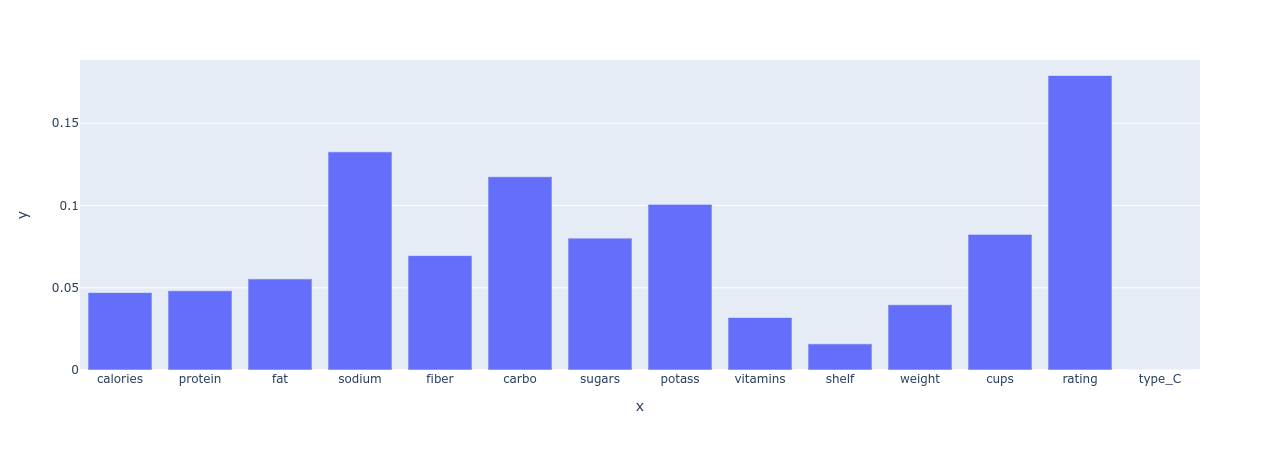

In [47]:
px.bar(x= (X.columns), y= (gradientBoostingClassifier.feature_importances_))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="rl*Wd%J:ec{~yZp{G@:l">gradientBoostingClassifier</variable></variables><block type="varDoMethod" id="!z5]f`%X4n*T=0{-(aa(" x="8" y="188"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">bar</field><data>px:bar</data><value name="INPUT"><block type="lists_create_with" id="19y.hEK|(vs{5EtoIY-="><mutation items="2"></mutation><value name="ADD0"><block type="valueOutputCodeBlock" id=")n6vNr^K-pZG`^]=$X)+"><field name="CODE">x=</field><value name="INPUT"><block type="varGetProperty" id="4)X({}.lRu_v`LhG=:S-"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><field name="MEMBER">columns</field><data>X:columns</data></block></value></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="4-@a}eiAHA(@jATo2|_k"><field name="CODE">y=</field><value name="INPUT"><block type="varGetProperty" id="^*LArgFS8F;I(9=v`~e^"><field name="VAR" id="rl*Wd%J:ec{~yZp{G@:l">gradientBoostingClassifier</field><field name="MEMBER">feature_importances_</field><data>gradientBoostingClassifier:feature_importances_</data></block></value></block></value></block></value></block></xml>

The most important features are:

- Sodium 
- Rating
- Cups (serving size)
- Carbohydrates
- Fat

This suggests possibly that some manufacturers are "healthier" in their brands than others, but we'd need to look more closely to be sure.

Cold cereal has no weight because it is 1 for all cereals.

### Overfit

As mentioned, we can look at the *deviance* to determine if we have too many models in our boosted model sequence.
The easiest way to do this is add *bagging* back to our model - that's right, we'll be boosting and bagging at the same time!
The reason is that if we add bagging, we can use OOB error as a way of testing overfit on our model.

All we have to do is add the following to our original model, and then rerun the cells back down to this point:

- freestyle `subsample=.5`

**This will bag with half the data.**

To plot the deviance:

- `import plotly.graph_objects as go`

In [48]:
import plotly.graph_objects as go

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/S5EHzNl)/I50f/-KSZQ">go</variable></variables><block type="importAs" id="WV{jUj%W/=n1;iRGdHoh" x="21" y="-12"><field name="libraryName">plotly.graph_objects</field><field name="libraryAlias" id="/S5EHzNl)/I50f/-KSZQ">go</field></block></xml>

Create an empty figure that we'll add multiple lines to:

- Create `fig` and set to `with go create Figure using`

In [49]:
fig = go.Figure()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FuH.yx^v|kVlL!174TwM">fig</variable><variable id="/S5EHzNl)/I50f/-KSZQ">go</variable></variables><block type="variables_set" id="/0h?*zn[*5v^D?X%MQok" x="75" y="137"><field name="VAR" id="FuH.yx^v|kVlL!174TwM">fig</field><value name="VALUE"><block type="varCreateObject" id="ccYq?D6[iomaxyAzJK/^"><field name="VAR" id="/S5EHzNl)/I50f/-KSZQ">go</field><field name="MEMBER">Figure</field><data>go:Figure</data></block></value></block></xml>

And add the two lines, one for training deviance and one for testing deviance:

- `with fig do add_scatter using` a list containing
    - freestyle `x=np.arange(0,100)` (this creates a list of 1 to 100 for the x-axes, where 100 is our number of models in the boosted model)
    - freestyle `y=gradientBoostingClassifier.train_score_`
    - freestyle `name="Training Deviance"`

- `with fig do add_scatter using` a list containing
    - freestyle `x=np.arange(0,100)` 
    - freestyle `y=gradientBoostingClassifier.oob_improvement_` 
    - freestyle `name="Testing Deviance"`
    

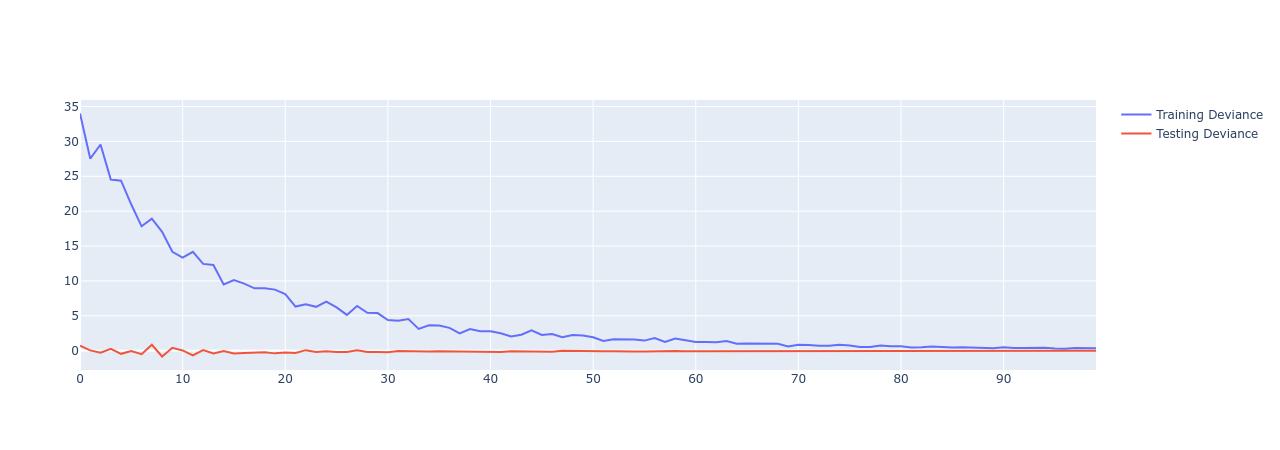

In [50]:
fig.add_scatter(x=np.arange(0,100), y=gradientBoostingClassifier.train_score_, name="Training Deviance")

fig.add_scatter(x=np.arange(0,100), y=gradientBoostingClassifier.oob_improvement_, name="Testing Deviance")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FuH.yx^v|kVlL!174TwM">fig</variable></variables><block type="varDoMethod" id="t+LX0/GT`Qh5{V)D|_Do" x="8" y="108"><field name="VAR" id="FuH.yx^v|kVlL!174TwM">fig</field><field name="MEMBER">add_scatter</field><data>fig:add_scatter</data><value name="INPUT"><block type="lists_create_with" id="$P.j=XWx|B{Y).~[lezc"><mutation items="3"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="Hwlm,itF~DgkC;2v8pR#"><field name="CODE">x=np.arange(0,100)</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="?Vn@H0+:Y,rip,w8aKf2"><field name="CODE">y=gradientBoostingClassifier.train_score_</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="GJ2OO1n10FnddKV3eGZ)"><field name="CODE">name="Training Deviance"</field></block></value></block></value></block><block type="varDoMethod" id="%th4!T:T(hpvb_^]Me[#" x="15" y="192"><field name="VAR" id="FuH.yx^v|kVlL!174TwM">fig</field><field name="MEMBER">add_scatter</field><data>fig:add_scatter</data><value name="INPUT"><block type="lists_create_with" id="JUgueIjO?}v?1eij{k0H"><mutation items="3"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="@pg^4a/R,=aqA`%8At`r"><field name="CODE">x=np.arange(0,100)</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id=",KXsqS*+JycIh?{g;`vQ"><field name="CODE">y=gradientBoostingClassifier.oob_improvement_</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="B5jcBj.Fhb9nYG#1H/]z"><field name="CODE">name="Testing Deviance"</field></block></value></block></value></block></xml>

This plot shows that the model has probably started to overfit early on, since there is not much improvement on the test set after about the 20th model.
If we wanted to, we could go back to the original model and specify `n_estimators=20` to stop the boosting at this point.

## Submit your work

When you have finished the notebook, please download it, log in to [OKpy](https://okpy.org/) using "Student Login", and submit it there.

Then let your instructor know on Slack.


<!-- NOTE: Tried to get the non-OOB version of deviance working, but it does not seem to play nice with the classifier version of gradient boosting 
This takes a little bit of effort with the regular gradient boosting model, because we need to calculate the test performance for each stage of the boosted model (every time we add another model, it is a stage, so we have 100 stages).

To save the test performances:

- Create variable `testList` and set to an empty list

testList = []

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Kk9f^1I7w+om?F:,5q)5">testList</variable></variables><block type="variables_set" id="YK;}A5*m0+S[Z4](NjlX" x="7" y="34"><field name="VAR" id="Kk9f^1I7w+om?F:,5q)5">testList</field><value name="VALUE"><block type="lists_create_with" id="Tm7Xtak|?y9FRf}[F5it"><mutation items="0"></mutation></block></value></block></xml>

Now we need to calculate the test performances in a loop and add each test performance to our list:

- `for each item i in list` `with gradientBoostingClassifier do staged_predict using` a list containing `in list splits get #2`
    - Create variable `testScore` and set to `with gradientBoostingClassifier do loss_ using` a list containing
        - `in list splits get # 4`
        - `i`
    - Use an empty freestyle followed by `with testList do append using testScore`

for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)
    


for i in gradientBoostingClassifier.staged_decision_function(splits[1]):
  testScore = gradientBoostingClassifier.loss_(np.ravel(splits[3]),i)
  (testList.append(testScore))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="29|[jgU99ocn(jj$7ECI">i</variable><variable id="rl*Wd%J:ec{~yZp{G@:l">gradientBoostingClassifier</variable><variable id="bgG#s+@:%UJt4*FH!Iq#">testScore</variable><variable id="Kk9f^1I7w+om?F:,5q)5">testList</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="controls_forEach" id="dr/g@$dWpO-4]],wBYo)" x="112" y="292"><field name="VAR" id="29|[jgU99ocn(jj$7ECI">i</field><value name="LIST"><block type="varDoMethod" id="d=4`G,8u5hj+dq?pT#Xt"><field name="VAR" id="rl*Wd%J:ec{~yZp{G@:l">gradientBoostingClassifier</field><field name="MEMBER">staged_decision_function</field><data>gradientBoostingClassifier:staged_decision_function</data><value name="INPUT"><block type="lists_create_with" id="ff#tOZL#H%BUh_Av!_ty"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="iK]O5g;M+.TI(ym^2AkI"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="~FNMBoCCjhgLGusk}^|m"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="o{9QSy[19@IFq|Nt[rCp"><field name="NUM">2</field></block></value></block></value></block></value></block></value><statement name="DO"><block type="variables_set" id="dy=e|46jiT@eLm|*l4Su"><field name="VAR" id="bgG#s+@:%UJt4*FH!Iq#">testScore</field><value name="VALUE"><block type="dummyOutputCodeBlock" id="M/paFk^`DwKm}2J3C_a$"><field name="CODE">gradientBoostingClassifier.loss_(splits[3],i)</field></block></value><next><block type="valueNoOutputCodeBlock" id="?DDcPwIF[od#!j[J|CPd"><field name="CODE"></field><value name="INPUT"><block type="varDoMethod" id=")qWkXc]SJ5e/M+JH0GIj"><field name="VAR" id="Kk9f^1I7w+om?F:,5q)5">testList</field><field name="MEMBER">append</field><data>testScore:</data><value name="INPUT"><block type="variables_get" id=")sj-WYP8;XOkKV{I*Noa"><field name="VAR" id="bgG#s+@:%UJt4*FH!Iq#">testScore</field></block></value></block></value></block></next></block></statement></block></xml>

import plotly.graph_objects as go

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/S5EHzNl)/I50f/-KSZQ">go</variable></variables><block type="importAs" id="WV{jUj%W/=n1;iRGdHoh" x="21" y="-12"><field name="libraryName">plotly.graph_objects</field><field name="libraryAlias" id="/S5EHzNl)/I50f/-KSZQ">go</field></block></xml>

fig = go.Figure(data= (go.Scatter(x=np.arange(0,100), y=testList)))
fig.show()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="FuH.yx^v|kVlL!174TwM">fig</variable><variable id="/S5EHzNl)/I50f/-KSZQ">go</variable></variables><block type="variables_set" id="/0h?*zn[*5v^D?X%MQok" x="75" y="137"><field name="VAR" id="FuH.yx^v|kVlL!174TwM">fig</field><value name="VALUE"><block type="varCreateObject" id="ccYq?D6[iomaxyAzJK/^"><field name="VAR" id="/S5EHzNl)/I50f/-KSZQ">go</field><field name="MEMBER">Figure</field><data>go:Figure</data><value name="INPUT"><block type="lists_create_with" id="ycPfDheyg}%lYK}8FM.Z"><mutation items="1"></mutation><value name="ADD0"><block type="valueOutputCodeBlock" id="Royn=;*Crd(jBx!p9.H@"><field name="CODE">data=</field><value name="INPUT"><block type="varCreateObject" id="4dN=dni.%x:pDs!.AZ{5"><field name="VAR" id="/S5EHzNl)/I50f/-KSZQ">go</field><field name="MEMBER">Scatter</field><data>go:Scatter</data><value name="INPUT"><block type="lists_create_with" id="9NwuXo_4F8YJ|Rv3ef!o"><mutation items="2"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="2Bo.__b@;5.j07_QV8Cd"><field name="CODE">x=np.arrange(0,100)</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="7Qx?|(7nd^r6q!A$_kZ4"><field name="CODE">y=testScore</field></block></value></block></value></block></value></block></value></block></value></block></value></block></xml> 
 -->